In [118]:
import tensorflow as tf
import pandas as pd
import os

In [43]:
import cv2
import imghdr
image_dir =  os.path.join("Data",'spiral','testing')
iamge_extends =['jpeg','jpg','png','bmp']
os.listdir(image_dir) # this allows to load all the i

['healthy', 'parkinson']

In [44]:
for image_folder in os.listdir(image_dir):
    for images in os.listdir(os.path.join(image_dir,image_folder)):
        print(images)
        image_path  = os.path.join(image_dir,image_folder)
        try:
            img  = cv2.imread(image_path)
        except Exception as e:
            print(e)
        

V01HE01.png
V01HE02.png
V01HE03.png
V02HE01.png
V02HE02.png
V02HE03.png
V03HE1.png
V03HE2.png
V03HE3.png
V04HE01.png
V04HE02.png
V04HE03.png
V05HE01.png
V05HE02.png
V05HE03.png
V06HE01.png
V06HE02.png
V06HE03.png
V07HE01.png
V07HE02.png
V07HE03.png
V08HE01.png
V08HE02.png
V08HE03.png
V09HE01.png
V09HE02.png
V09HE03.png
V10HE01.png
V10HE02.png
V10HE03.png
V11HE01.png
V11HE02.png
V11HE03.png
V12HE01.png
V12HE02.png
V12HE03.png
V55HE01.png
V55HE02.png
V55HE03.png
V55HE04.png
V55HE05.png
V55HE06.png
V55HE07.png
V55HE08.png
V55HE09.png
V55HE10.png
V55HE11.png
V55HE12.png
V55HE13.png
V55HE14.png
V55HE15.png
V01PE01.png
V01PE02.png
V01PE03.png
V02PE01.png
V02PE02.png
V02PE03.png
V03PE01.png
V03PE02.png
V03PE03.png
V03PE04.png
V03PE05.png
V03PE06.png
V03PE07.png
V03PE08.png
V03PE09.png
V04PE01.png
V04PE02.png
V04PE03.png
V05PE01.png
V05PE02.png
V05PE03.png
V06PE01.png
V06PE02.png
V06PE03.png
V07PE01.png
V07PE02.png
V07PE03.png
V08PE01.png
V08PE02.png
V08PE03.png
V09PE01.png
V09PE02.png
V09PE03

In [45]:
tf.data.Dataset.list_files


<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [46]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join('Data','spiral','training'))

Found 72 files belonging to 2 classes.


In [47]:
data.class_names

['healthy', 'parkinson']

In [48]:
data_iterator = data.as_numpy_iterator()

In [49]:
data_iterator

In [50]:
batch = data_iterator.next()

In [51]:
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

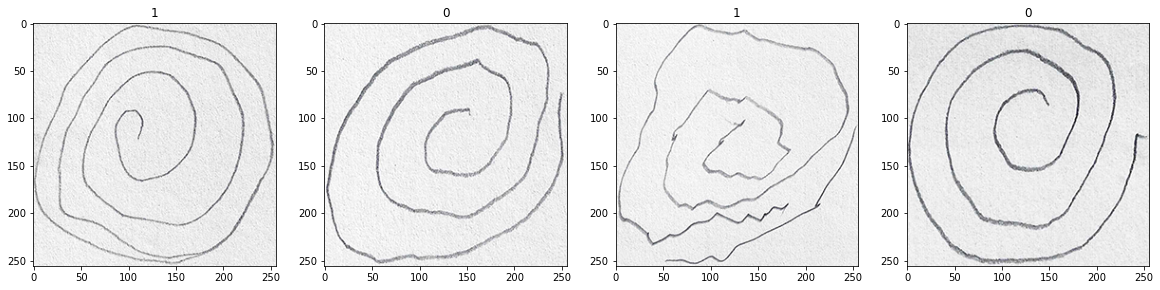

In [52]:
import matplotlib.pyplot as plt 
fig,ax =plt.subplots(ncols = 4 ,figsize =(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### pre processing



In [53]:
data = data.map(lambda x,y:(x/255,y))

In [54]:
train_size = int(len(data)*.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [55]:
train_size+val_size+test_size

3

In [56]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
len(train)

2

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))


In [58]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [60]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)       

In [61]:
logdir='logs'


In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [141]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/25
2/2 [==============================] - 5s 3s/step - loss: 1.9729e-06 - accuracy: 1.0000
Epoch 2/25
2/2 [==============================] - 6s 3s/step - loss: 1.9654e-06 - accuracy: 1.0000
Epoch 3/25
2/2 [==============================] - 4s 2s/step - loss: 1.7903e-06 - accuracy: 1.0000
Epoch 4/25
2/2 [==============================] - 4s 2s/step - loss: 1.8360e-06 - accuracy: 1.0000
Epoch 5/25
2/2 [==============================] - 4s 2s/step - loss: 1.6264e-06 - accuracy: 1.0000
Epoch 6/25
2/2 [==============================] - 5s 2s/step - loss: 1.4737e-06 - accuracy: 1.0000
Epoch 7/25
2/2 [==============================] - 5s 3s/step - loss: 1.5274e-06 - accuracy: 1.0000
Epoch 8/25
2/2 [==============================] - 6s 3s/step - loss: 1.6513e-06 - accuracy: 1.0000
Epoch 9/25
2/2 [==============================] - 5s 3s/step - loss: 1.5025e-06 - accuracy: 1.0000
Epoch 10/25
2/2 [==============================] - 5s 2s/step - loss: 1.3418e-06 - accuracy: 1.0000
Epoch 11/

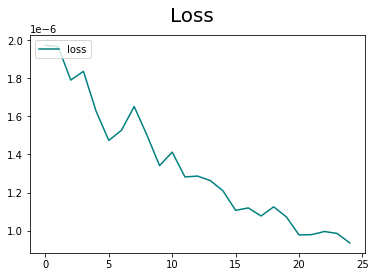

In [142]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

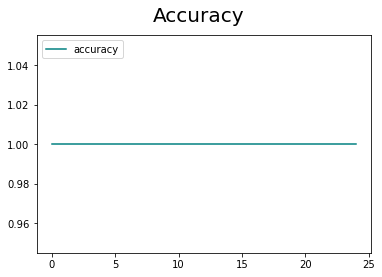

In [143]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [144]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [145]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [146]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 189ms/step


In [147]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [148]:
print(pre.result(), re.result(), acc.result())



tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [149]:
import cv2


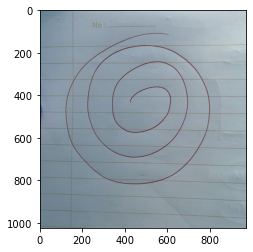

In [150]:
img = cv2.imread('my_handwriting.jpg')
plt.imshow(img)
plt.show()

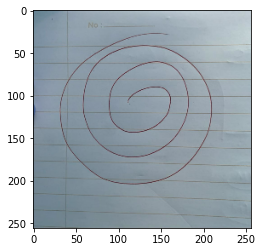

In [151]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [152]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 68ms/step


In [153]:
yhat

array([[0.9830731]], dtype=float32)

In [154]:
if yhat > 0.5: 
    print(f'Predicted class is parkinosns')
else:
    print(f'Predicted class is healthy')

Predicted class is parkinosns


In [155]:
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [156]:
total = 0;
correct =0
predictions = pd.DataFrame(columns=['Actual', 'Predicted'])


for image_folder in os.listdir(image_dir):
    for images in os.listdir(os.path.join(image_dir,image_folder)):
        image_path  = os.path.join(image_dir,image_folder,images)
        img = cv2.imread(image_path)
        resize = tf.image.resize(img, (256,256))
        yhat = model.predict(np.expand_dims(resize/255, 0))
        total = total+1
        
        if (yhat>0.5 and  image_folder=="parkinson"):
            new_data = {'Actual': 1, 'Predicted': 1}
            predictions = predictions.append(new_data, ignore_index=True)
        elif(yhat<0.5 and  image_folder=="healthy") :
            new_data = {'Actual': 0, 'Predicted': 0}
            predictions = predictions.append(new_data, ignore_index=True)
        elif(yhat>0.5 and  image_folder=="healthy") :
            new_data = {'Actual': 0, 'Predicted': 1}
            predictions = predictions.append(new_data, ignore_index=True)
        elif(yhat<0.5 and  image_folder=="parkinson") :
            new_data = {'Actual': 1, 'Predicted': 0}
            predictions = predictions.append(new_data, ignore_index=True)
        try:
            img  = cv2.imread(image_path)
        except Exception as e:
            print(e)

1/1 [==============================] - 0s 60ms/step


In [157]:
predictions

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
97,1,1
98,1,1
99,1,1
100,1,1


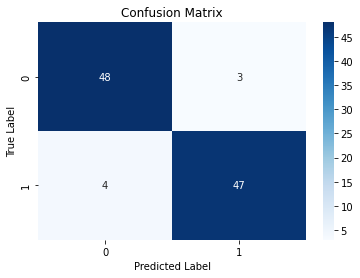

Accuracy: 0.9313725490196079
Confusion Matrix:
 [[48  3]
 [ 4 47]]
Dataframe:
      actual  predicted
0         0          0
1         0          0
2         0          0
3         0          1
4         0          0
..      ...        ...
97        1          1
98        1          1
99        1          1
100       1          1
101       1          1

[102 rows x 2 columns]


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
y_test = predictions["Actual"].values.astype(int)
y_pred=  predictions["Predicted"].values.astype(int)




accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a dataframe with the actual and predicted labels
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Dataframe:\n', df)

In [159]:
conf_matrix

array([[48,  3],
       [ 4, 47]], dtype=int64)